In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Query 5.1

In [50]:
df = pd.read_csv('Large_Cap/AXISBANK.csv')
df = df[df['Series']=='EQ']
df.dropna(inplace = True)

In [51]:
df['return'] = df['Close Price'].pct_change()

mean = df['return'].mean()
std = df['return'].std()

annual_return = mean*252
annual_std = std*np.sqrt(252)

print('Annual return = ', annual_return)
print('Annual volatility = ', annual_std)

Annual return =  0.23319431204851307
Annual volatility =  0.27791735464771966


## Query 5.2

In [52]:
df1 = pd.read_csv('Large_Cap/CIPLA.csv')
df2 = pd.read_csv('Large_Cap/HDFC.csv')
df3 = pd.read_csv('Mid_Cap/APOLLOTYRE.csv')
df4 = pd.read_csv('Small_Cap/ASHOKA.csv')
df5 = pd.read_csv('Small_Cap/IDFC.csv')

df1 = df1[df1.Series == 'EQ']
df2 = df2[df2.Series == 'EQ']
df3 = df3[df3.Series == 'EQ']
df4 = df4[df4.Series == 'EQ']
df5 = df5[df5.Series == 'EQ']

df1.dropna(inplace = True)
df2.dropna(inplace = True)
df3.dropna(inplace = True)
df4.dropna(inplace = True)
df5.dropna(inplace = True)

data = pd.concat([df1['Close Price'],df2['Close Price'],df3['Close Price'],df4['Close Price'],df5['Close Price']], axis = 1)
data.columns = ['cipla','hdfc','apollo','ashoka','idfc']

In [53]:
returns = data.pct_change()
returns.fillna(0, inplace = True) 

mean_returns = returns.mean()
cov = returns.cov()

weights = np.asarray([0.20,0.20,0.20,0.20,0.20])

portfolio_return = np.sum(mean_returns*weights)*252
portfolio_std = np.sqrt(np.dot(weights,np.dot(cov,weights.T)))*np.sqrt(252)

print('Annual mean return = ', portfolio_return)
print('Annual volatility = ', portfolio_std)

Annual mean return =  -0.04937077944587986
Annual volatility =  0.13864771316414223


## Query 5.3

In [54]:
plt.rcParams['figure.figsize'] = (14,7)

num_portfolio = 15000

results = np.zeros((num_portfolio, 3+data.columns.size))

for i in range(num_portfolio):
    
    weights = np.array(np.random.random(data.columns.size))
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_returns*weights)*252
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252)
    
    results[i,0] = portfolio_return
    results[i,1] = portfolio_std
    
    results[i,2] = results[i,0] / results[i,1]
    
    for j in range(len(weights)):
        results[i,j+3] = weights[j]
        
results_frame = pd.DataFrame(results, columns = ['ret','std','sharpe','cipla','hdfc','apollo','ashoka','idfc'])

In [55]:
results_frame.head()

,ret,std,sharpe,cipla,hdfc,apollo,ashoka,idfc
0,-0.006878,0.122323,-0.056225,0.237495,0.428418,0.046577,0.037883,0.249627
1,-0.033565,0.146405,-0.229262,0.292205,0.206051,0.173642,0.262960,0.065142
2,-0.004907,0.120249,-0.040810,0.210668,0.351239,0.264967,0.034342,0.138784
3,-0.019157,0.123790,-0.154752,0.237354,0.272620,0.271663,0.055758,0.162604
4,-0.063302,0.143141,-0.442232,0.220710,0.157803,0.157356,0.139940,0.324190


## Query 5.4

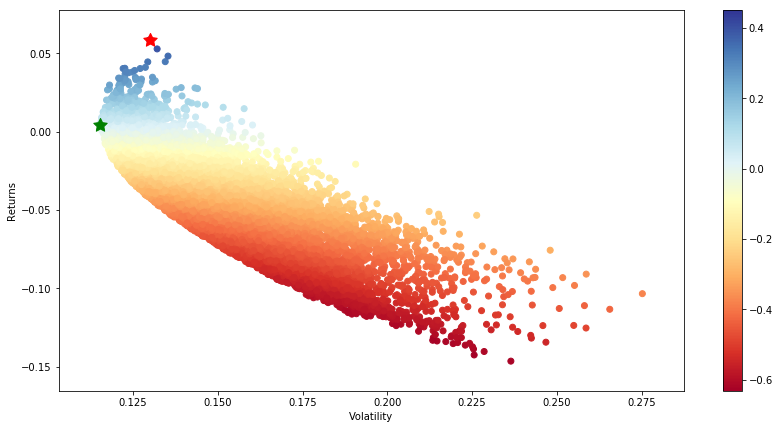

In [58]:
max_sharpe = results_frame.iloc[results_frame['sharpe'].idxmax()]

min_vol = results_frame.iloc[results_frame['std'].idxmin()]

plt.scatter(results_frame['std'],results_frame['ret'], c = results_frame.sharpe, cmap = 'RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

plt.scatter(max_sharpe[1], max_sharpe[0], marker = (5,1,0), color = 'r', s = 200)

plt.scatter(min_vol[1], min_vol[0], marker = (5,1,0), color = 'g', s = 200)